# Construct Dataset

In [14]:
import pycbc.noise
import pycbc.psd
import pycbc.filter
import pylab
from pycbc.filter import sigma
from pycbc.waveform import get_td_waveform
from pycbc.types.timeseries import load_timeseries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.random import uniform, randint
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split

#import data functions
from ipynb.fs.full.data_functions import gw, visualize, bol

Trial 1 for regression! 
- no noise added pure signal. 
- signals fully contained in windows of 1 second
- masses randomly generated (ranges for masses shown below)
    - unlike later trials of classifier, here we will make sure the whole waveform around 0.8 second length
- train and test generated in one batch. Then separate.

The following range guarentees that the whole waveform < around 0.8 so that it fits in the window.)

SCHEME:
- 75-100 and 10-100
- 70-75 and 12-75
- 65-70 and 14-70
- 55-65 and 16-65 
- 50-55 and 18-55
- 45-50 and 20-50
- 40-45 and 24-45
- 35-40 and 28-40
- 30-35 and 30-35

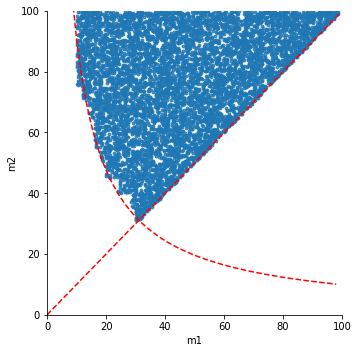

In [15]:
# Randomly generate masses IN ASCENDING ORDER
# Training masses 
mass = []
for i in np.arange(2):   # repeat process twice for data
    for u in np.arange(95,101):
        for l in np.arange(10,101):
            pair = [uniform(95,100),uniform(10,100)]
            pair.sort()
            mass.append(pair)
    for u in np.arange(90,95):
        for l in np.arange(10,95):
            pair = [uniform(90,95),uniform(10,95)]
            pair.sort()
            mass.append(pair)
    for u in np.arange(85,90):
        for l in np.arange(10,90):
            pair = [uniform(85,90),uniform(10,90)]
            pair.sort()
            mass.append(pair)
    for u in np.arange(80,85):
        for l in np.arange(10,85):
            pair = [uniform(80,85),uniform(10,85)]
            pair.sort()
            mass.append(pair)
    for u in np.arange(75,80):
        for l in np.arange(10,80):
            pair = [uniform(75,80),uniform(10,80)]
            pair.sort()
            mass.append(pair)
    for u in np.arange(70,75):
        for l in np.arange(12,75):
            pair = [uniform(70,75),uniform(12,75)]
            pair.sort()
            mass.append(pair)
    for u in np.arange(65,70):
        for l in np.arange(14,70):
            pair = [uniform(65,70),uniform(14,70)]
            pair.sort()
            mass.append(pair)
    for u in np.arange(60,65):
        for l in np.arange(16,65):
            pair = [uniform(60,65),uniform(16,65)]
            pair.sort()
            mass.append(pair)
    for u in np.arange(55,60):
        for l in np.arange(16,60):
            pair = [uniform(55,60),uniform(16,60)]
            pair.sort()
            mass.append(pair)
    for u in np.arange(50,55):
        for l in np.arange(18,55):
            pair = [uniform(50,55),uniform(18,55)]
            pair.sort()
            mass.append(pair)
    for u in np.arange(45,50):
        for l in np.arange(20,50):
            pair = [uniform(45,50),uniform(20,50)]
            pair.sort()
            mass.append(pair)
    for u in np.arange(40,45):
        for l in np.arange(24,45):
            pair = [uniform(40,45),uniform(24,45)]
            pair.sort()
            mass.append(pair)
    for u in np.arange(35,40):
        for l in np.arange(28,40):
            pair = [uniform(35,40),uniform(28,40)]
            pair.sort()
            mass.append(pair)
    for u in np.arange(30,35):
        for l in np.arange(30,35):
            pair = [uniform(30,35),uniform(30,35)]
            pair.sort()
            mass.append(pair)

mass = pd.DataFrame(mass)
mass.columns = ['m1','m2']

# Create scatterplot of dataframe
sns.lmplot('m1', 'm2', data=mass, fit_reg=False, 
           scatter_kws={"s": 8})
plt.ylim(0,100)
plt.xlim(0,100)

plt.plot(np.arange(100),'r--')
plt.plot(1000/np.arange(1,100),'r--')
plt.show()

Unexpected finding: for length to be less than around 0.8, we have the range of masses constrained by the above 2 functions!

In [16]:
# target: [m1,m2] where m1 <= m2
# note that only need to append X, y is basically mass dataframe
def appendX(wave):
    wave.save('temporary2.txt')
    wave = np.loadtxt('temporary2.txt',usecols=1)
    X.append(wave)

In [18]:
# Generate data of pure gw (snr = \infty) 
X = []
y = mass

for i in tqdm(range(len(mass))):
    gww = gw(mass.loc[i,'m1'], mass.loc[i,'m2'])
    appendX(gww)

100%|██████████| 7362/7362 [17:55<00:00, 10.75it/s]   


In [19]:
# Save as dataframe
X_df = pd.DataFrame(X)

In [20]:
# Since sklearn makes things a lot easier, can just store the whole data and split every time. 
# If want to recreate the split just use same random seed

# '''ALREADY DONE NO NEED REPEAT
f_path = 'regression_training/stage1/X.txt'
X_df.to_csv(f_path)
f_path = 'regression_training/stage1/y.txt'
y.to_csv(f_path) 
#'''

In [21]:
# statistic information
print("Number of data: ",len(X))

Number of data:  7362
